### Import libraries

In [20]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load Data

In [21]:
data = pd.read_excel("Movement_dataset_v2.xlsx")
data.head()

,Subject ID,Activity ID,Time stamp,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz
0,1,1,1,0.28409,-9.5692,1.4931,0.70501,-0.48968,0.058939,-0.98630,-8.7188,4.1161,0.64510,-0.45175,0.69181
1,1,1,2,0.41798,-9.6980,1.4880,0.70501,-0.48968,0.058939,-0.98795,-9.0372,4.2773,0.66667,-0.44353,0.66810
2,1,1,3,0.33479,-9.5896,1.4405,0.69388,-0.48593,0.078585,-0.89327,-8.7099,4.0124,0.66667,-0.44353,0.66810
3,1,1,4,0.27516,-9.6480,1.5412,0.69388,-0.48593,0.078585,-0.95632,-8.7986,4.1434,0.66667,-0.44353,0.66810
4,1,1,5,0.32434,-9.6298,1.3759,0.69388,-0.48593,0.078585,-0.95808,-8.5089,4.1058,0.66863,-0.45175,0.69181


## Q1.1. Are there any highly correlated variables (i.e., correlation larger than 0.90)? 

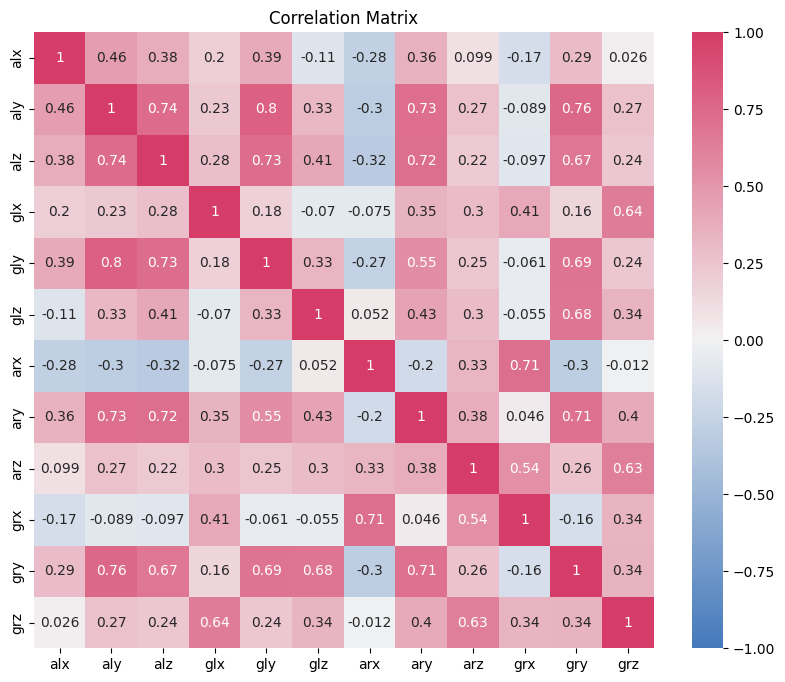

In [22]:
correlation_matrix = data[data.columns[3:]].corr()

correlated_pairs = []

# Iterate through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > 0.9:
            correlated_pairs.append((i, j))

# Create an empty matrix with NaN values
highlight_matrix = np.empty_like(correlation_matrix, dtype=float)
highlight_matrix[:] = np.nan

# Set the correlation values for highly correlated pairs
for pair in correlated_pairs:
    highlight_matrix[pair[0], pair[1]] = correlation_matrix.iloc[pair[0], pair[1]]
    highlight_matrix[pair[1], pair[0]] = correlation_matrix.iloc[pair[1], pair[0]]

# Create a colormap with white for NaN values
cmap = sns.diverging_palette(250, 1, as_cmap=True)
cmap.set_bad('white')

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, vmin=-1, vmax=1)#, mask=np.isnan(highlight_matrix))

# Set the title and display the heatmap
plt.title('Correlation Matrix')
plt.show()

## Q1.2. Are there any missing data? 


In [23]:
missing_data = False

number_of_patients=10
number_of_experiments=4
number_of_timestamps=30

for patient_number in range(1,number_of_patients+1):
    patient_data = data[data.iloc[:, 0]==patient_number]
    if patient_data.empty:
        missing_data=True
        break
    else:
        for experiment_number in range(1, number_of_experiments+1):
            experiment_data = patient_data[patient_data.iloc[:, 1]==experiment_number]
            if experiment_data.empty:
                missing_data=True
                break
            else:
                for timestamp_number in range(1, number_of_timestamps+1):
                    timestamp_data = experiment_data[experiment_data.iloc[:, 2]==timestamp_number]
                if timestamp_data.empty:
                    missing_data=True
                    break
                else:
                    if timestamp_data.isnull().any().any():
                        missing_data=True
                        break

if missing_data:
    print("There is missing data in the dataset!")
else:
    print("There is no missing data in the dataset!")

There is no missing data in the dataset!


## Q1.3. How many duplicated rows are present in your dataset, if any?

In [24]:
no_duplicates = data[data.duplicated()].empty

if no_duplicates:
    print("There are no duplicates in the dataset!")
else:
    print("There are duplicates in the dataset!")

There are no duplicates in the dataset!


## Q1.4. What type(s) of scaling procedures among the ones reported below would be in principle correct for the dataset under analysis and why? 

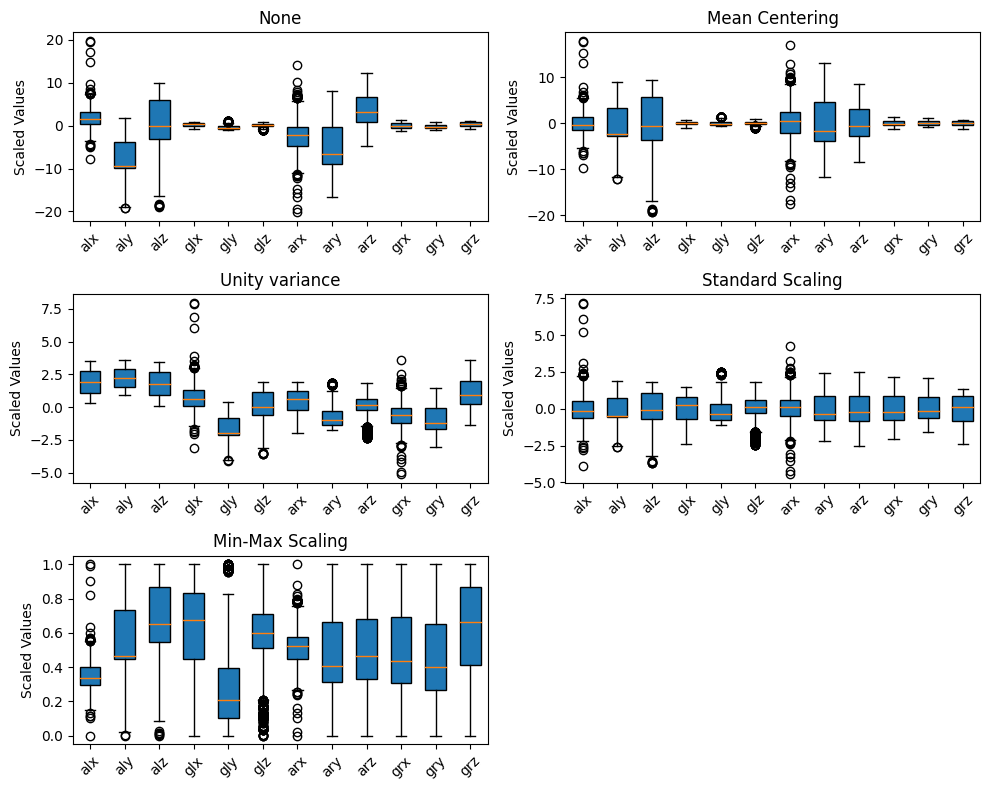

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

data_of_interest = data[data.columns[3:]]
# List of scaling methods
scaling_methods = ['None', 'Mean Centering', 'Unity variance', 'Standard Scaling', 'Min-Max Scaling']

# List to store the scaled variables
scaled_variables = []

# Perform scaling for each method
scaled_variables.append(data_of_interest.values)  # Without scaling
scaled_variables.append(data_of_interest.values - data_of_interest.values.mean(axis=0))  # Mean centering
scaled_variables.append(data.values / np.std(data.values, axis=0))  # Unity variance scaling
scaled_variables.append(StandardScaler().fit_transform(data_of_interest.values))  # Standard Scaling
scaled_variables.append(MinMaxScaler().fit_transform(data_of_interest.values))  # Min-max scaling

# Create a figure with subplots for each scaling method
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

# Iterate over scaling methods
for i, method in enumerate(scaling_methods):
    row = i // 2
    col = i % 2
    # Create boxplots for each variable with the same scaling method
    boxplot_data = [scaled_variables[i][:, j] for j in range(len(data_of_interest.columns))]
    axes[row, col].boxplot(boxplot_data, widths=0.6, patch_artist=True)
    axes[row, col].set_xticklabels(data_of_interest.columns, rotation=45)
    axes[row, col].set_ylabel('Scaled Values')
    axes[row, col].set_title(method)

fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()


### 2 Principal Component Analysis

In [26]:
columns_to_scale = data.columns[3:]
data[columns_to_scale] = (data[columns_to_scale] - data[columns_to_scale].min()) / (data[columns_to_scale].max() - data[columns_to_scale].min())

## Q2.1 How many variables are necessary to capture at least 90% of your dataset variance? 

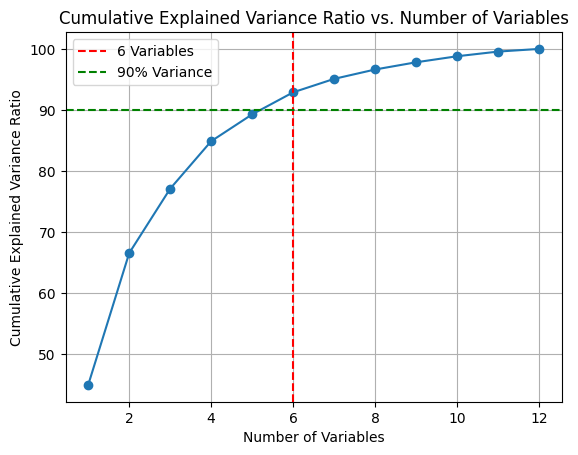

In [27]:
from sklearn.decomposition import PCA

pcadata=data[data.columns[3:]]

# Perform PCA analysis
pca = PCA()
pca.fit(pcadata)

# Calculate cumulative explained variance ratio
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)*100

# Determine the number of variables needed to capture at least 90% of the variance
num_variables_needed = len(explained_variance_ratio_cumulative[explained_variance_ratio_cumulative < 90]) + 1

# Plot the cumulative explained variance ratio
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o')
plt.xlabel('Number of Variables')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Variables')
plt.axvline(x=num_variables_needed, color='r', linestyle='--', label=f'{num_variables_needed} Variables')
plt.axhline(y=90, color='g', linestyle='--', label='90% Variance')
plt.legend()
plt.grid(True)
plt.show()

## Q2.2 What variable has the largest effect on PC1? 

In [28]:
pca = PCA(n_components=6)
pca.fit(pcadata)

loadings_pc1 = pca.components_[0]

# Find the variable with the highest impact on PC1
variable_index = np.abs(loadings_pc1).argmax()
variable_with_highest_impact = pcadata.columns[variable_index]

# Print the variable with the highest impact on PC1
print("Variable with the highest impact on PC1:", variable_with_highest_impact, loadings_pc1[variable_index])

Variable with the highest impact on PC1: gry 0.4658038148080058


## Q2.3 What variable has the largest effect on PC2?

In [29]:
loadings_pc2 = pca.components_[1]

# Find the variable with the highest impact on PC2
variable_index = np.abs(loadings_pc2).argmax()
variable_with_highest_impact = pcadata.columns[variable_index]

# Print the variable with the highest impact on PC2
print("Variable with the highest impact on PC2:", variable_with_highest_impact, loadings_pc2[variable_index])

Variable with the highest impact on PC2: grx 0.5205831608044037


## Q2.4 Is there a variable that is not relevant to compute PC2? 

In [30]:
# Find the variable with the lowest impact on PC2
variable_index = np.abs(loadings_pc2).argmin()
variable_with_lowest_impact = pcadata.columns[variable_index]

# Print the variable with the lowest impact on PC2
print(f"Variable with the lowest impact on PC2: {variable_with_lowest_impact}, {loadings_pc2[variable_index]}")

Variable with the lowest impact on PC2: ary, -0.012029241176522668


## Q2.5. Do variables coming from the same sensor contribute similarly to PC1 and PC2? 

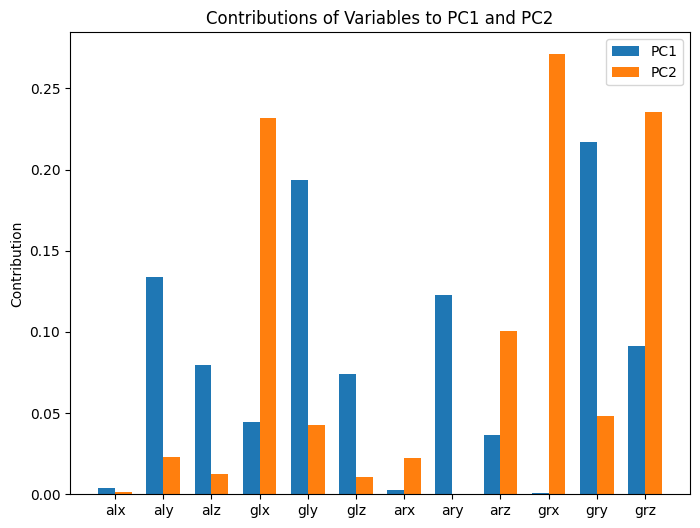

In [31]:
# Calculate the contributions of variables to PC1 and PC2
contributions_PC1 = loadings_pc1**2 / np.sum(loadings_pc1**2)
contributions_PC2 = loadings_pc2**2 / np.sum(loadings_pc2**2)

# Plot the contributions
fig, ax = plt.subplots(figsize=(8, 6))

variables = pcadata.columns
x = np.arange(len(variables))
width = 0.35

ax.bar(x - width/2, contributions_PC1, width, label='PC1')
ax.bar(x + width/2, contributions_PC2, width, label='PC2')

ax.set_xticks(x)
ax.set_xticklabels(variables)
ax.set_ylabel('Contribution')
ax.set_title('Contributions of Variables to PC1 and PC2')
ax.legend()

plt.show()

## Q3.1. If you have answered yes to the previous question (Q.2.7), do these groups correspond to some information you have available, and if so, what information?  

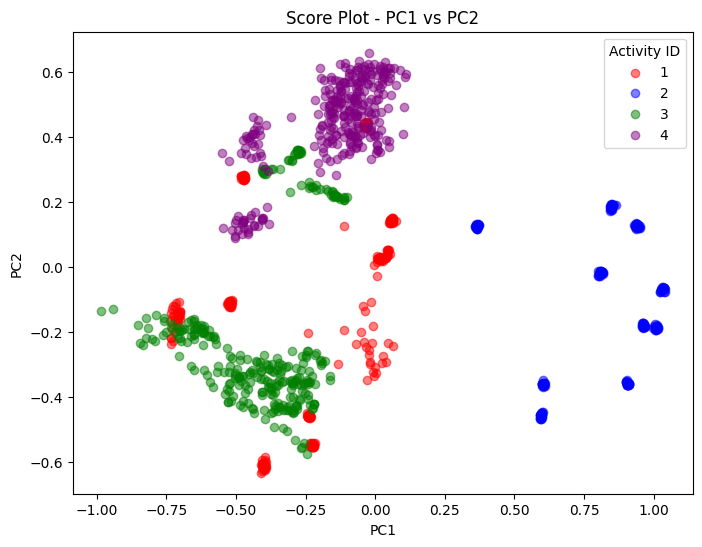

In [32]:
# Transform the data into the reduced-dimensional space
scores = pca.transform(pcadata)

# Create a scatter plot of the scores, colored by class
plt.figure(figsize=(8, 6))

classes = data['Activity ID'].unique()
colors = ['red', 'blue', 'green', 'purple']

for cls, color in zip(classes, colors):
    indices = data['Activity ID'] == cls
    plt.scatter(scores[indices, 0], scores[indices, 1], c=color, alpha=0.5, label=cls)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Score Plot - PC1 vs PC2')
plt.legend(title="Activity ID")

plt.show()

## Q.3.2. Are there features that clearly separate class 1 from the other ones? 

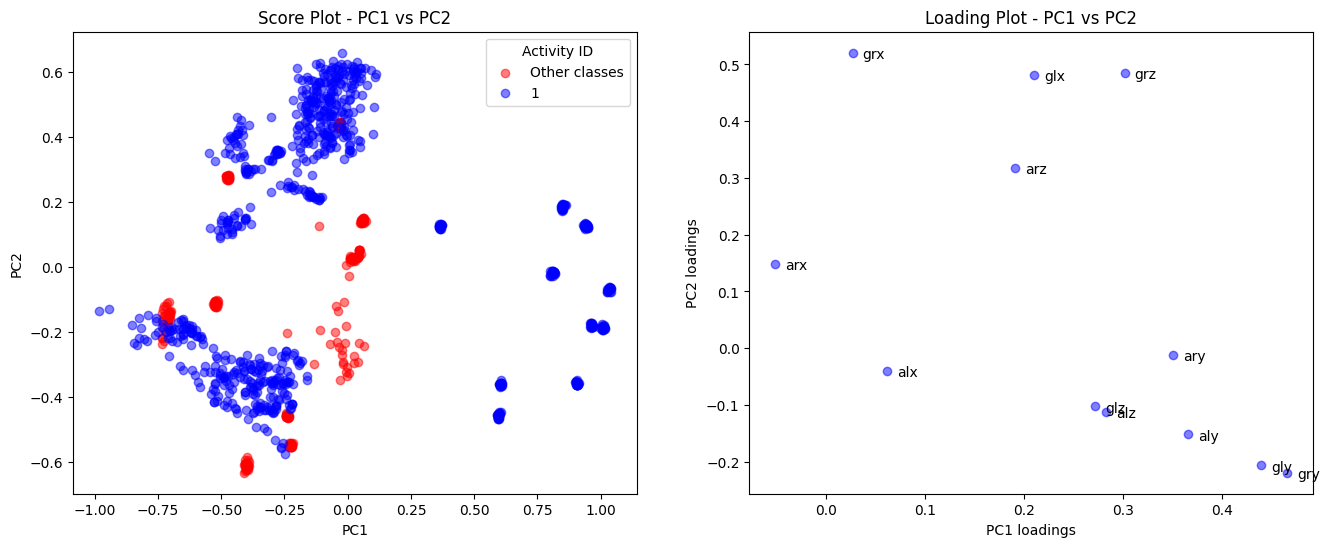

In [33]:
# Select data for class 1 and the other classes
scores = pca.transform(pcadata)

# Create a scatter plot of the scores, colored by class
plot, axes = plt.subplots(1,2,figsize=(16, 6))
ax = axes.flatten()

classes = data['Activity ID'].unique()

for cls in classes:
    indices = data['Activity ID'] == cls
    if cls == 1:
        ax[0].scatter(scores[indices, 0], scores[indices, 1], c='red', alpha=0.5, label=cls)
    else:
        ax[0].scatter(scores[indices, 0], scores[indices, 1], c='blue', alpha=0.5, label='Other classes')    

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('Score Plot - PC1 vs PC2')
# Get the handles and labels from the legend
handles, labels = ax[0].get_legend_handles_labels()
# Remove duplicates from the labels
unique_labels = list(set(labels))
# Create a new legend with the unique labels
ax[0].legend(handles, unique_labels, title='Activity ID')
for i, column in enumerate(pcadata.columns):
    ax[1].scatter(loadings_pc1[i], loadings_pc2[i], c='blue', alpha=0.5)
    ax[1].annotate(column, (loadings_pc1[i]+0.01, loadings_pc2[i]-0.01))
ax[1].set_xlabel('PC1 loadings')
ax[1].set_ylabel('PC2 loadings')
ax[1].set_title('Loading Plot - PC1 vs PC2')

plt.show()

## Q.3.3. Are there features that clearly separate class 2 from the other ones?  

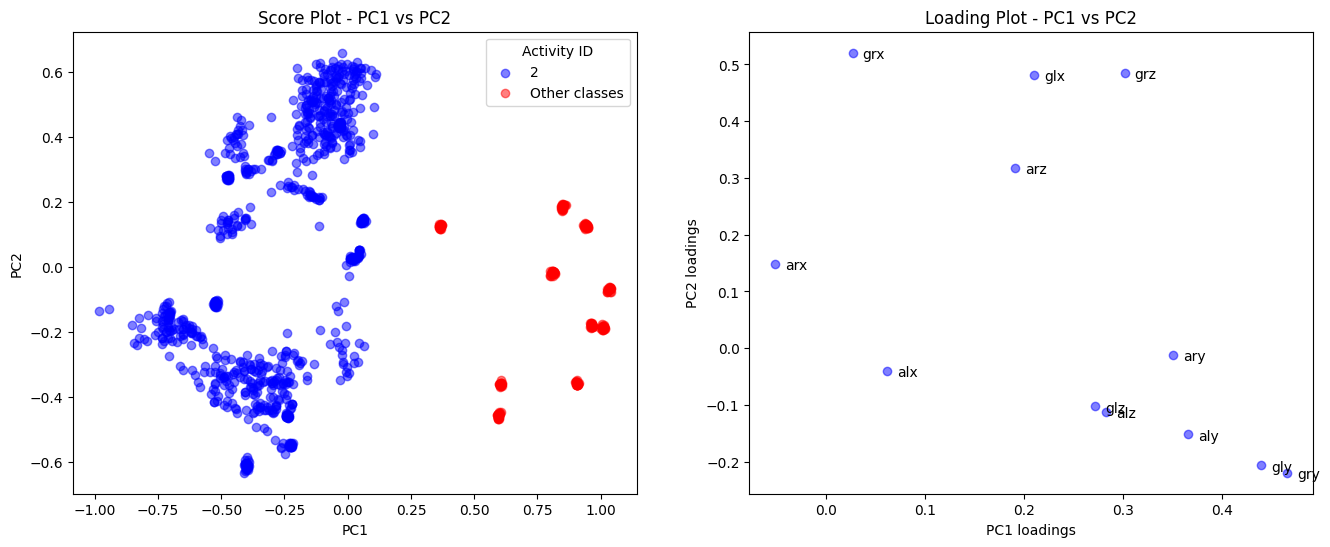

In [34]:
# Select data for class 1 and the other classes
scores = pca.transform(pcadata)

# Create a scatter plot of the scores, colored by class
plot, axes = plt.subplots(1,2,figsize=(16, 6))
ax = axes.flatten()

classes = data['Activity ID'].unique()

for cls in classes:
    indices = data['Activity ID'] == cls
    if cls == 2:
        ax[0].scatter(scores[indices, 0], scores[indices, 1], c='red', alpha=0.5, label=cls)
    else:
        ax[0].scatter(scores[indices, 0], scores[indices, 1], c='blue', alpha=0.5, label='Other classes')    

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('Score Plot - PC1 vs PC2')
# Get the handles and labels from the legend
handles, labels = ax[0].get_legend_handles_labels()
# Remove duplicates from the labels
unique_labels = list(set(labels))
# Create a new legend with the unique labels
ax[0].legend(handles, unique_labels, title='Activity ID')
for i, column in enumerate(pcadata.columns):
    ax[1].scatter(loadings_pc1[i], loadings_pc2[i], c='blue', alpha=0.5)
    ax[1].annotate(column, (loadings_pc1[i]+0.01, loadings_pc2[i]-0.01))
ax[1].set_xlabel('PC1 loadings')
ax[1].set_ylabel('PC2 loadings')
ax[1].set_title('Loading Plot - PC1 vs PC2')

plt.show()

## Q.3.4. If one were to develop an approach to distinguish only between Walking (activity no. 2) and Jogging (activity no. 4) only, and had to choose between measuring only acceleration or gyroscopic information, what would they choose?  

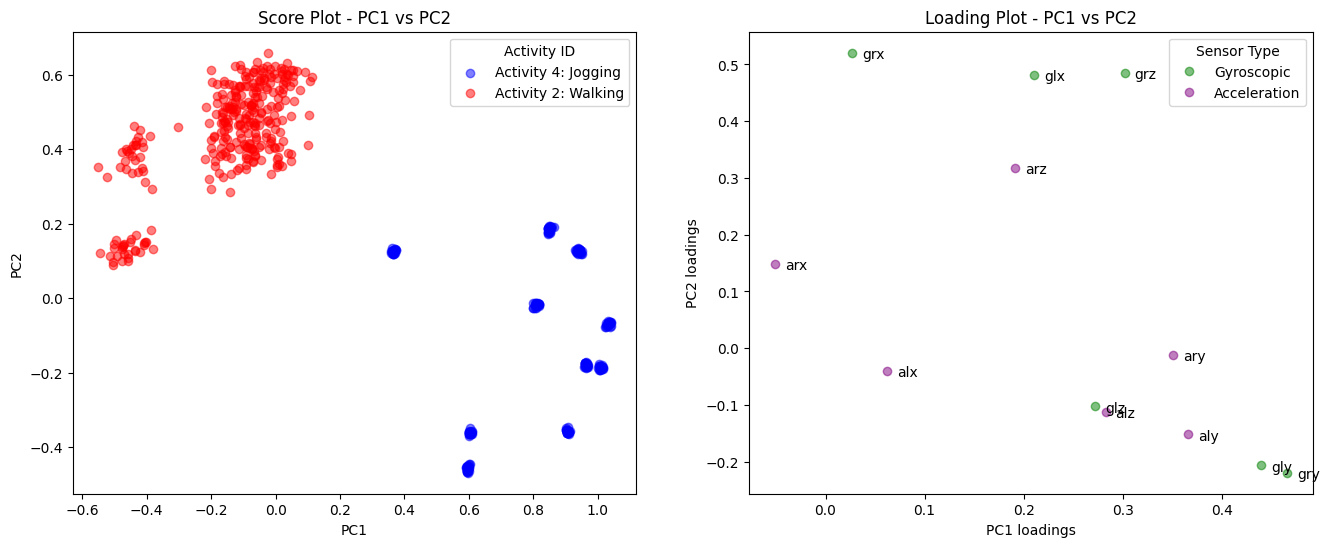

In [35]:
# Select data for class 1 and the other classes
scores = pca.transform(pcadata)
# Create a scatter plot of the scores, colored by class
plot, axes = plt.subplots(1,2,figsize=(16, 6))
ax = axes.flatten()
classes = data['Activity ID'].unique()
for cls in classes:
    indices = data['Activity ID'] == cls
    if cls == 2:
        ax[0].scatter(scores[indices, 0], scores[indices, 1], c='blue', alpha=0.5, label='Activity 2: Walking')
    if cls == 4:
        ax[0].scatter(scores[indices, 0], scores[indices, 1], c='red', alpha=0.5, label='Activity 4: Jogging')    
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('Score Plot - PC1 vs PC2')
handles, labels = ax[0].get_legend_handles_labels()
unique_labels = list(set(labels))
ax[0].legend(handles, unique_labels, title='Activity ID')

for i, column in enumerate(pcadata.columns):
    if column[0] == 'g':
        ax[1].scatter(loadings_pc1[i], loadings_pc2[i], c='green', alpha=0.5, label="Gyroscopic")
        ax[1].annotate(column, (loadings_pc1[i]+0.01, loadings_pc2[i]-0.01))
    if column[0] == 'a':
        ax[1].scatter(loadings_pc1[i], loadings_pc2[i], c='purple', alpha=0.5, label="Acceleration")
        ax[1].annotate(column, (loadings_pc1[i]+0.01, loadings_pc2[i]-0.01))
ax[1].set_xlabel('PC1 loadings')
ax[1].set_ylabel('PC2 loadings')
ax[1].set_title('Loading Plot - PC1 vs PC2')

from matplotlib.lines import Line2D
# Create custom legend handles with desired colors
custom_handles = [Line2D([], [], marker='o', color='green', alpha=0.5, linestyle='None'),
                  Line2D([], [], marker='o', color='purple', alpha=0.5, linestyle='None')]

# Create labels corresponding to the custom handles
labels = ['Gyroscopic', 'Acceleration']
ax[1].legend(custom_handles, labels, title='Sensor Type')

plt.show()
